# Upset-Downset

This notebook is an introduction to the game Upset-Downset and the interface we've written for it in Python. In this first section lets learn the ups and downs of Upset-Downset.

## What Is Upset-Downset?

Combinatorial games are games in which
- two players who alternate turns making moves from a clearly defined ruleset,
- there is perfect information, i.e., each player has complete knowledge of the game at all times,
- there are no chance elements, e.g., no dice rolling or card shuffling, and
- play is finite where the first player unable to move loses. 

Upset-Downset is a combinatorial game in which the two players alternate turns deleting nodes
from graphs. The **Up** player moves by deleting a node, together with any
nodes connected to it by a path moving strictly *upward.* Similarly, the **Down** player moves by deleting a
node, together with any nodes connected to it by a path moving strictly *downward*. Eventually one of the
players will find they cannot move because there are no nodes left. Whoever is first to find themselves in
this predicament loses.

The best way to learn to play, is *to* play! To begin, let's import the `upDown` module, initialize a game and plot it using the `plot()` method.

In [9]:
from upDown import UpDown

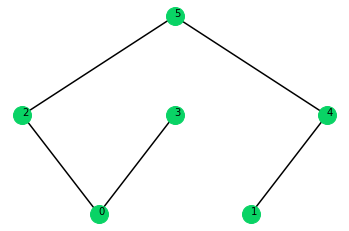

In [2]:
graph = {0:[2,3], 1:[4], 2:[5], 3:[], 4:[5], 5:[]}
G = UpDown(graph)
G.plot()

As you can see it was easy to initialize the `upDown` object `G`. All that was needed was a dictionary representation of the graph:  every node $x$ in the graph is a key with corresponding value being the list of all nodes that are directly adjacent and above $x$.

You can interactively play the game `G` using the `play()` method and following the given instructions.

In [ ]:
G.play()

## Blue, Green and Red Nodes!

To make things even more exciting, lets add some color to our nodes: blue, green or red! The only added caveat is that  **Up** may only choose from green or blue nodes and **Down** from only green or red nodes. Though, whichever node **Up**/**Down** chooses, all nodes above/below the chosen node are still removed regardless of their color.

Lets color the nodes in the game `G`. To do so, we only need to define a coloring dictionary indicating which color (values) a specific node (key) is, and re-initialize `G` with the coloring dictionary as an argument. (We use the convention that $1$ corresponds to blue, $0$ to green, and $-1$ to red.)

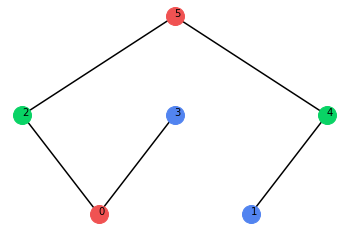

In [3]:
colors = {0:-1, 1:1, 2:0, 3:1, 4:0, 5:-1}
G = UpDown(graph, colors)
G.plot()

Let's play again, but with the new coloring!

In [ ]:
G.play()

# Playing Random Games

The game `G` is fine, but there's no limit to the size of the game or the structure of the underlying graph! So why not think bigger than five nodes? Lets import `RandomGame`  and see what other types of games we can play.

In [3]:
from randomUpDown import RandomGame

In the cell below we randomly generate a game of Upset-Downset with `num_nodes` nodes for you to test your skills. By default we've set `num_nodes = 10`, but it's a variable so do as your heart desires. Additionally, the default is to randomly color the nodes blue, green or red. To turn this feature off and play on all green games, set `RGB = False`. Have fun!

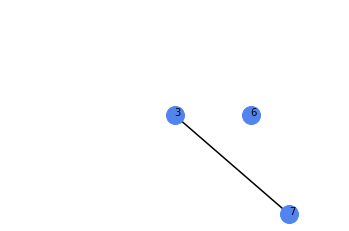


 Up wins!


In [26]:
num_nodes = 10
RGB = True #False

#Comment this line out if you want to play a specific game again.
R = RandomGame(num_nodes, RGB = RGB)

R.play()

# Too Random?

It's pretty hard to work out a general strategy with such random games right? You never know what yor'e going to get. In this section we describe two more subclasses of `UpDown` for playing games with more structure.

## This Notebook Would Not Be Complete Without...

playing Upset-Downset on complete bipartite graphs. Let's import `CompleteBipartiteGame` and initialize an instance with a list of ordered pairs as an argument. Each ordered pair $(m,n)$ defines a distinct complete bipartite graph having $m$-nodes on top and $n$-nodes on bottom.

In [27]:
from completeBipartiteUpDown import CompleteBipartiteGame

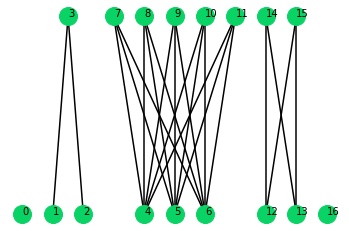

In [28]:
graphs = [(0,1), (1,2), (5,3), (2,2), (0,1)]
K = CompleteBipartiteGame(graphs)
K.plot()

Give it a go!

In [ ]:
K.play()

## The Secret of Nim

That's right, we can play a game of NIm dressed up as Upset-Downset. If you're unfamiliar, in Nim two players take turns removing objects from heaps. On their turn a player may remove any number of objects from exactly one heap, and the player to remove the last object wins. 

Lets see how a game of Nim can be realized as a game of Upset-Downset. To start we import the `nimUpDown` module and initialize a `NimGame` object with a list of the heap sizes we'd like to play on as an argument. 

In [8]:
from nimUpDown import NimGame

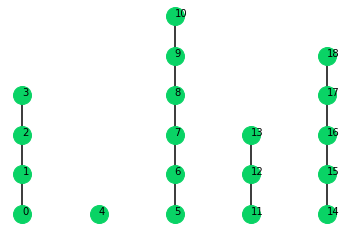

In [9]:
heaps = [4,1,6,3,5]
N = NimGame(heaps)
N.plot()

In making a move in a game of Nim all that matters is which heap you play in and how many objects to remove from that heap. How about you give it a try with the game `N`.

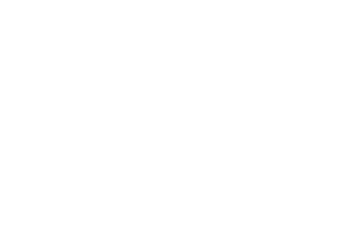


 Down wins!


In [53]:
N.play()

# So You've Got Some Chops?

Now that you've had a chance to play a few games how about you try your luck against the AlphaZero model. Let's import the `alpha` agent, initialize both an agent and a game, and call the `play()` method with the agent as an argument.

In [10]:
from agents import alpha_agent, random_agent

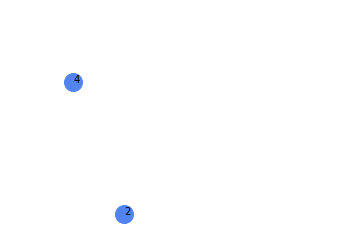


 Up wins!


In [11]:
H = RandomGame(10, RGB=True)
H.play(agent_1=random_agent)

We can also watch the `alpha_agent` play against itself!

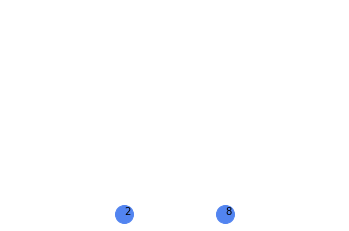


 Up wins!


In [12]:
H.play(agent_1=alpha_agent, agent_2=alpha_agent)